Tarea portada de discos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans
from skimage import io
import os
from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
carpeta = "C:/Users/carol/Downloads/wu-tang-clan-enter-the-wu-tang-36-chambers (1)"
imagenes = os.listdir(carpeta)

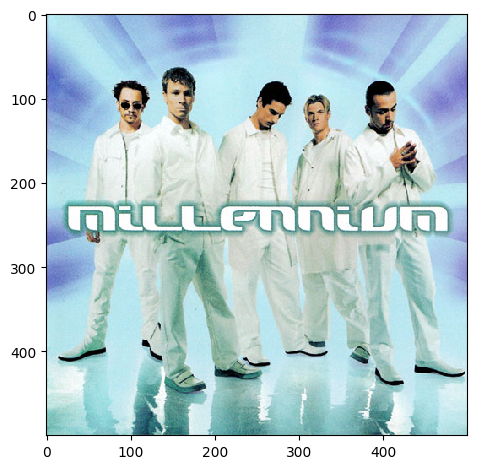

In [3]:
from skimage import io

ruta_imagen = "C:/Users/carol/Downloads/wu-tang-clan-enter-the-wu-tang-36-chambers (1)/backstreet-boys-millenium.jpg"
imagen = io.imread(ruta_imagen)

io.imshow(imagen)
io.show()


In [4]:
height, width, channels = imagen.shape
print(imagen.shape)

(500, 500, 3)


In [5]:
reshape_imagen = imagen.reshape(height * width, channels)

In [6]:
k = 8
kmeans = KMeans(n_clusters=k)


In [7]:
kmeans.fit(reshape_imagen)

# Utilizar MiniBatchKMeans como alternativa a KMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
minibatch_kmeans.fit(reshape_imagen)

c:\Users\carol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans()

In [8]:
centroides = kmeans.cluster_centers_

# Extraer las etiquetas predichas
etiquetas = kmeans.labels_

# Generar un conteo de ocurrencia de las etiquetas
conteo_etiquetas = np.unique(etiquetas, return_counts=True)

# Imprimir los valores de los centroides
print("Valores de los centroides:")
print(centroides)

# Imprimir el conteo de ocurrencia de las etiquetas
print("Conteo de ocurrencia de las etiquetas:")
etiquetas_uniq, conteo_uniq = conteo_etiquetas
for etiqueta, conteo in zip(etiquetas_uniq, conteo_uniq):
    print("Etiqueta:", etiqueta, "- Conteo:", conteo)

Valores de los centroides:
[[128.84611623 146.74378318 210.15723666]
 [188.43186065 229.55102912 238.41067514]
 [ 20.421746    23.67082382  26.07412612]
 [159.42097443 197.31233973 223.28511515]
 [198.2555156  210.66000097 202.02920595]
 [ 91.95019083 134.36425383 125.3020894 ]
 [144.06765095 180.99486318 169.04067457]
 [234.3516272  240.97255921 239.09185638]]
Conteo de ocurrencia de las etiquetas:
Etiqueta: 0 - Conteo: 14317
Etiqueta: 1 - Conteo: 67984
Etiqueta: 2 - Conteo: 5697
Etiqueta: 3 - Conteo: 41573
Etiqueta: 4 - Conteo: 41110
Etiqueta: 5 - Conteo: 15480
Etiqueta: 6 - Conteo: 30977
Etiqueta: 7 - Conteo: 32862


In [9]:
def rgb_to_hex(rgb):
    r, g, b = rgb
    hex_value = '#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b))
    return hex_value

# Convertir los valores de los centroides a formato hexadecimal
centroides_hex = list(map(rgb_to_hex, centroides))

# Imprimir los valores de los centroides en formato hexadecimal
print("Valores de los centroides en formato hexadecimal:")
for i, hex_value in enumerate(centroides_hex):
    print("Centroide", i+1, ":", hex_value)

Valores de los centroides en formato hexadecimal:
Centroide 1 : #8092d2
Centroide 2 : #bce5ee
Centroide 3 : #14171a
Centroide 4 : #9fc5df
Centroide 5 : #c6d2ca
Centroide 6 : #5b867d
Centroide 7 : #90b4a9
Centroide 8 : #eaf0ef


In [10]:
count_pixels = conteo_etiquetas[1]

# Calcular el porcentaje de ocurrencia de cada color respecto a cluster_centers_
percent_occurrence = count_pixels / count_pixels.sum() * 100

# Crear el DataFrame con las variables solicitadas
df = pd.DataFrame({
    'hex': centroides_hex,
    'count': count_pixels,
    'percentage': percent_occurrence
})

# Ordenar los colores de forma descendente por el porcentaje de ocurrencia
df = df.sort_values('percentage', ascending=False)

# Imprimir el DataFrame ordenado
print(df)

       hex  count  percentage
1  #bce5ee  67984     27.1936
3  #9fc5df  41573     16.6292
4  #c6d2ca  41110     16.4440
7  #eaf0ef  32862     13.1448
6  #90b4a9  30977     12.3908
5  #5b867d  15480      6.1920
0  #8092d2  14317      5.7268
2  #14171a   5697      2.2788


c:\Users\carol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


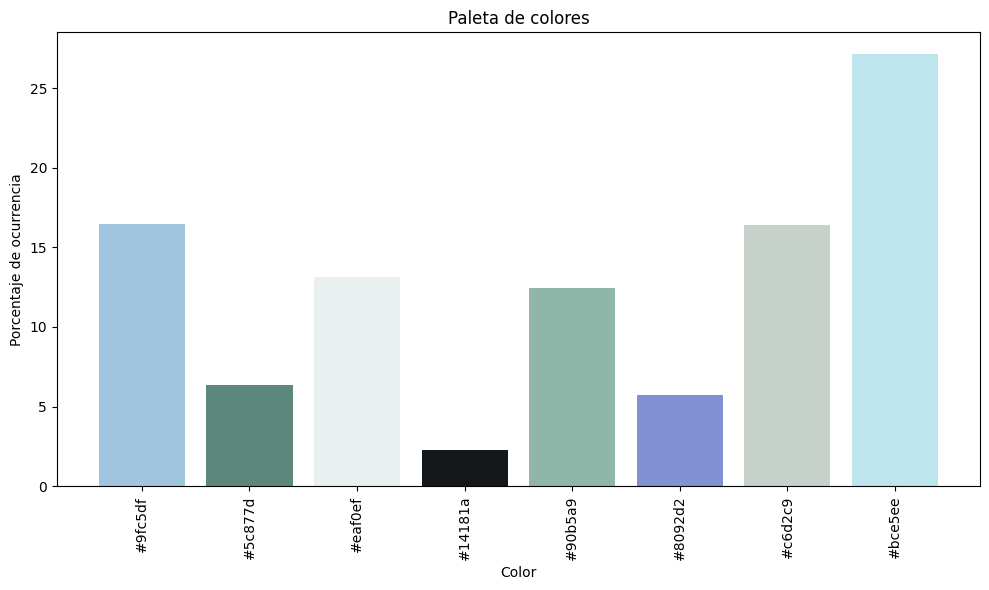

In [11]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


def generate_color_palette(image_path, k):
    def rgb_to_hex(rgb):
        r, g, b = rgb
        hex_value = '#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b))
        return hex_value

    # Cargar la imagen
    image = io.imread(image_path)

    # Obtener la altura, el ancho y la cantidad de canales de la imagen
    height, width, channels = image.shape

    # Redimensionar la imagen utilizando reshape
    reshaped_image = image.reshape(height * width, channels)

    # Inicializar el algoritmo KMeans con k
    kmeans = KMeans(n_clusters=k)

    # Ajustar el modelo KMeans a los datos de la imagen
    kmeans.fit(reshaped_image)

    # Extraer los valores de los centroides
    centroides = kmeans.cluster_centers_

    # Convertir los valores de los centroides a formato hexadecimal
    centroides_hex = list(map(rgb_to_hex, centroides))

    # Extraer las etiquetas predichas
    etiquetas = kmeans.labels_

    # Generar un conteo de ocurrencia de las etiquetas
    conteo_etiquetas = np.unique(etiquetas, return_counts=True)

    # Calcular la ocurrencia del color en cada píxel
    count_pixels = conteo_etiquetas[1]

    # Calcular el porcentaje de ocurrencia de cada color respecto a cluster_centers_
    percent_occurrence = count_pixels / count_pixels.sum() * 100

    # Crear el DataFrame con las variables solicitadas
    df = pd.DataFrame({
        'hex': centroides_hex,
        'count': count_pixels,
        'percentage': percent_occurrence
    })

    # Ordenar los colores de forma descendente por el porcentaje de ocurrencia
    df = df.sort_values('percentage', ascending=False)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df['percentage'], color=df['hex'])
    plt.xlabel('Color')
    plt.ylabel('Porcentaje de ocurrencia')
    plt.title('Paleta de colores')
    plt.xticks(df.index, df['hex'], rotation='vertical')
    plt.tight_layout()
    plt.show()


# Ejemplo de uso de la función
ruta_imagen = "C:/Users/carol/Downloads/wu-tang-clan-enter-the-wu-tang-36-chambers (1)/backstreet-boys-millenium.jpg"
k = 8
generate_color_palette(ruta_imagen, k)
